In [2]:
%cd drive/MyDrive/DataMining/hw3

/content/drive/MyDrive/DataMining/hw3


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from numpy import mean
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Df = pd.read_csv('pop_failures.csv')

In [5]:
Df.head()

,Unnamed: 0,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1


In [6]:
# a
y = Df['outcome']
X = Df.drop(columns=['outcome'])

In [7]:


kf = KFold(n_splits=10, random_state=1, shuffle=True)

KNN_clf = KNeighborsClassifier(n_neighbors=3)
scores_KNN = cross_val_score(KNN_clf, X, y, scoring='accuracy', cv=kf)

In [8]:
NB_clf = GaussianNB()
scores_NB = cross_val_score(NB_clf, X, y, scoring='accuracy', cv=kf)

In [9]:
SVM_clf = SVC()
scores_SVM = cross_val_score(SVM_clf, X, y, scoring='accuracy', cv=kf)

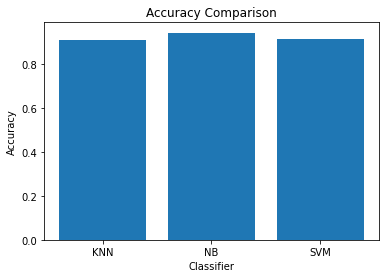

In [10]:

Classifier = ['KNN', 'NB', 'SVM']
Score = [mean(scores_KNN), mean(scores_NB), mean(scores_SVM)]

plt.bar(Classifier, Score)
plt.title('Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show()

In [11]:
print("KNN_clf accuracy = ", mean(scores_KNN))
print("SVM_clf accuracy = ", mean(scores_SVM))
print("NB_clf accuracy = ", mean(scores_NB))

KNN_clf accuracy =  0.9092592592592592
SVM_clf accuracy =  0.9148148148148147
NB_clf accuracy =  0.9444444444444446


In [12]:
# b
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [13]:

models = [('KNN', KNN_clf),('SVM', SVM_clf), ('NB', NB_clf)]
stacking_clf = StackingClassifier(estimators=models, final_estimator=LogisticRegression())
kf = KFold(n_splits=10, random_state=1, shuffle=True)
stacking_clf.fit(x_train, y_train)
scores_Lg = cross_val_score(stacking_clf, x_test, y_test, scoring='accuracy', cv=kf)
print("stacking_clf accuracy = ", mean(scores_Lg))

stacking_clf accuracy =  0.89
